<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/16%20compare_CAGR_of_assets_2025.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

Статья [Сравнение доходности активов за 2024 год](https://rostsber.ru/publish/stocks/returns2024.html) на блоге "Рост Сбережений"

In [ ]:
!pip install okama

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

ok.__version__

'1.5.0'

## Активы

### 2003 для 20+ лет

In [3]:
ls_2003 = [
    'RGBITR.INDX',
    'RUCBTRNS.INDX',
    'OKID10.INDX',  # c 1997 года
    'MCFTR.INDX',
    'SP500TR.INDX',
    # 'IDCOTCTR.INDX',  # US Treasuries
    'SP500BDT.INDX',  # US bonds
    'FNER.INDX',  # REITS
    'MOW_SEC.RE',
    'GC.COMM',
    'SI.COMM',
    'USDRUB.FX',
    'EURRUB.FX',
    'CNYRUB.FX'
]
len(ls_2003)

13

In [4]:
lg_2003 = {
    'RGBITR.INDX': 'Облигации федерального займа РФ (Индекс RGBI)',
    'RUCBTRNS.INDX': 'Корпоративные облигации РФ (индекс RUCBTRNS)',
    'OKID10.INDX': 'Депозиты в рублях TOP10 (индекс OKID 10)',
    'MCFTR.INDX': 'Акции РФ (Индекс Мосбиржи)',
    'SP500TR.INDX': 'Акции США (Индекс S&P 500)',
    # 'IDCOTCTR.INDX': 'Казначейские облигации США (Индекс ICE U.S Treasury Core Bond)',
    'SP500BDT.INDX': 'Корпоративные облигации США (Индекс S&P 500 bonds)',
    'FNER.INDX': 'Недвижимость США (Индекс REIT)',
    'MOW_SEC.RE': 'Недвижимость Москвы (цена кв. метра)',  # раз в квартал 
    'GC.COMM': 'Золото (цены спот)',
    'SI.COMM': 'Серебро (цены спот)',
    'USDRUB.FX': 'Доллар США',
    'EURRUB.FX': 'Евро',
    'CNYRUB.FX': 'Юань',
    'RUB.INFL': 'Инфляция',
}
len(lg_2003)

14

### 2010 для 15+ лет

In [5]:
ls_2010 = ls_2003 + [
    'OKID.INDX',  # c 2010 года
    'RUONIA.INDX',  # c 2010-02
    'BTC-USD.CC'
]

In [6]:
lg_2010 = {**lg_2003, **{
    'OKID.INDX': 'Депозиты в рублях (индекс OKID)',
    'RUONIA.INDX': 'Денежные фонды (индекс RUSFAR)',
    'BTC-USD.CC': 'Биткоин (BTC)'
}}

### Короткая история

In [7]:
ls_2020 = ls_2010 + [
    'MREDC.INDX',  # c 2010 года
]

In [8]:
lg_2020 = {**lg_2010, **{
    'MREDC.INDX': 'Недвижимость Москвы (индекс MREDC)',
}}

In [9]:
ls_2020

['RGBITR.INDX',
 'RUCBTRNS.INDX',
 'OKID10.INDX',
 'MCFTR.INDX',
 'SP500TR.INDX',
 'SP500BDT.INDX',
 'FNER.INDX',
 'MOW_SEC.RE',
 'GC.COMM',
 'SI.COMM',
 'USDRUB.FX',
 'EURRUB.FX',
 'CNYRUB.FX',
 'OKID.INDX',
 'RUONIA.INDX',
 'BTC-USD.CC',
 'MREDC.INDX']

## Функция рисования графиков

In [10]:
def plot_cagr(assets: ok.AssetList, legend_dic: dict, plot_title: str, figsize: list = [12, 10]):
    fig, ax = plt.subplots(figsize=figsize)
    fig.subplots_adjust(right=1.2)

    inflation = assets.get_cagr().at['RUB.INFL'] * 100
    names = assets.get_cagr().sort_values().index
    width = 0.7  # ширина прямоугольники (в данном случае высота)

    for name in names:
        value = assets.get_cagr().loc[name] * 100
        color = 'grey' if name == 'RUB.INFL' else 'green'
        if 0 <= value < inflation:
            color = 'yellow'
        elif value < 0:
            color = 'red'
        ax.barh(name, value, width, color=color)

    ax.axvline(x=assets.get_cagr().loc["USDRUB.FX"] * 100, linestyle="--")


    # Добавление титула и надписей на оси Y
    x = np.arange(len(names))  # the label locations
    ax.set_title(plot_title)
    ax.set_yticks(x)
    ax.set_yticklabels([legend_dic[x] for x in names])
    # ax.legend()

    # Добавление аннотаций к прямоугольникам
    rects = ax.containers
    for rect in rects:
        width = rect[0].get_width()  # Ширина прямоугольника
        shift = 20 if width >= 0 else -20
        ax.annotate(f'{width:.2f}%',
                    xy=(width, rect[0].get_y() + rect[0].get_height() / 2),
                    # координаты точки, откуда начинается аннотация
                    xytext=(shift, 0),  # смещение надписи вправо
                    textcoords="offset points",
                    ha='center', va='center')
    if any(assets.get_cagr().values < 0):
        ax.axvline(x=0, color='black', linewidth=1)  # вертикальная линия на отметке х=0

In [127]:
def plot_rolling_cagr(assets_dict: dict, ccy: str, window: int, first_date='1900-01', real: bool = 'True', chart: str = "cagr", draw_zero_axe=True):
    assets_tickers = assets_dict.keys()
    real = real if chart == "cagr" else False
    al = ok.AssetList(assets_tickers, ccy=ccy, first_date=first_date, inflation=real)
    df = al.get_rolling_cagr(window=window, real=True) * 100 if chart == "cagr" else al.get_rolling_risk_annual(window=window) * 100
    max_value = df.to_numpy().max()
    min_value = df.to_numpy().min()
    
    # plot
    fig = plt.figure(figsize=(12,6))
    # fig.subplots_adjust(bottom=0.2, top=1.5)
    ax = plt.gca()
    first_date_dt = df.index[0]
    print(f'{first_date_dt=}')
    last_date_dt = pd.to_datetime('2024-12')
    
    colors = ["blue", "red", "green", "yellow", "black"]

    for asset, color in zip(assets_dict.items(), colors):
        ticker = asset[0]
        description = asset[1]
        ax.plot(df.index.to_timestamp(), df[ticker], label=description, color=color)

    # ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    if draw_zero_axe:
        ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.set_xlim(first_date_dt, last_date_dt)

    if chart == "cagr":
        min_value = min_value * 1.05 if min_value < 0 else min_value * 0.95
    elif chart == "risk":
        min_value = 0
    
    ax.set_ylim(min_value, max_value)
    ax.set_xlim(first_date_dt, last_date_dt + pd.DateOffset(months=1))
    leg = ax.legend(loc='upper left')
    # Создаём сетку на графике
    # ax.grid(which='major', linewidth=1.2, linestyle='--', color='blue')

## 20 лет

In [12]:
assets20 = ok.AssetList(ls_2003, first_date='2006-01', last_date='2025-12', inflation=True, ccy='RUB')
assets20

assets           [RGBITR.INDX, RUCBTRNS.INDX, OKID10.INDX, MCFT...
currency                                                       RUB
first_date                                                 2006-01
last_date                                                  2025-12
period_length                                   20 years, 0 months
inflation                                                 RUB.INFL
dtype: object

In [55]:
assets20.assets_first_dates

{'RGBITR.INDX': Timestamp('2006-01-01 00:00:00'),
 'RUCBTRNS.INDX': Timestamp('2006-01-01 00:00:00'),
 'OKID10.INDX': Timestamp('2006-01-01 00:00:00'),
 'MCFTR.INDX': Timestamp('2006-01-01 00:00:00'),
 'SP500TR.INDX': Timestamp('2006-01-01 00:00:00'),
 'SP500BDT.INDX': Timestamp('2006-01-01 00:00:00'),
 'FNER.INDX': Timestamp('2006-01-01 00:00:00'),
 'MOW_SEC.RE': Timestamp('2006-01-01 00:00:00'),
 'GC.COMM': Timestamp('2006-01-01 00:00:00'),
 'SI.COMM': Timestamp('2006-01-01 00:00:00'),
 'USDRUB.FX': Timestamp('2006-01-01 00:00:00'),
 'EURRUB.FX': Timestamp('2006-01-01 00:00:00'),
 'CNYRUB.FX': Timestamp('2006-01-01 00:00:00'),
 'RUB': Timestamp('2006-01-01 00:00:00'),
 'RUB.INFL': Timestamp('2006-01-01 00:00:00')}

In [56]:
assets20.assets_last_dates

{'RGBITR.INDX': Timestamp('2025-12-01 00:00:00'),
 'RUCBTRNS.INDX': Timestamp('2025-12-01 00:00:00'),
 'OKID10.INDX': Timestamp('2025-12-01 00:00:00'),
 'MCFTR.INDX': Timestamp('2025-12-01 00:00:00'),
 'SP500TR.INDX': Timestamp('2025-12-01 00:00:00'),
 'SP500BDT.INDX': Timestamp('2025-12-01 00:00:00'),
 'FNER.INDX': Timestamp('2025-12-01 00:00:00'),
 'MOW_SEC.RE': Timestamp('2025-12-01 00:00:00'),
 'GC.COMM': Timestamp('2025-12-01 00:00:00'),
 'SI.COMM': Timestamp('2025-12-01 00:00:00'),
 'USDRUB.FX': Timestamp('2025-12-01 00:00:00'),
 'EURRUB.FX': Timestamp('2025-12-01 00:00:00'),
 'CNYRUB.FX': Timestamp('2025-12-01 00:00:00'),
 'RUB': Timestamp('2025-12-01 00:00:00'),
 'RUB.INFL': Timestamp('2025-12-01 00:00:00')}

Text(0.5, 1.0, 'Накопленный доход за 20 лет')

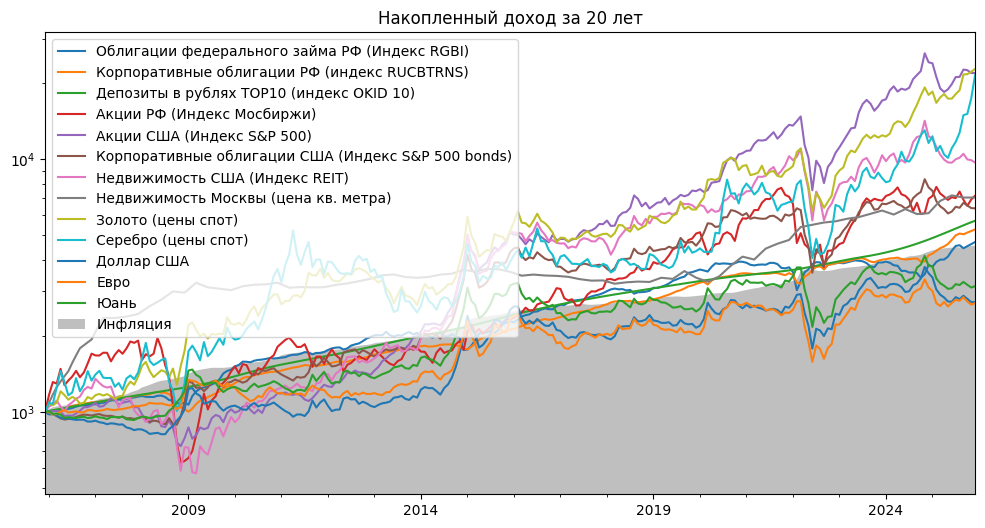

In [17]:
assets20.wealth_indexes.iloc[:, :-1].plot(logy=True)
plt.fill_between(assets20.wealth_indexes.index.to_timestamp(), 0, assets20.wealth_indexes['RUB.INFL'], facecolor='grey', alpha=0.5)
plt.legend(lg_2003.values())
plt.xlabel("")
plt.title('Накопленный доход за 20 лет')

In [58]:
assets20.describe([1, 5, 10, 20])

,property,period,RGBITR.INDX,RUCBTRNS.INDX,OKID10.INDX,MCFTR.INDX,SP500TR.INDX,SP500BDT.INDX,FNER.INDX,MOW_SEC.RE,GC.COMM,SI.COMM,USDRUB.FX,EURRUB.FX,CNYRUB.FX,inflation
0,Compound return,YTD,0.23095,0.264948,0.186578,0.029293,-0.093023,-0.173781,-0.213264,0.153493,0.267663,0.857741,-0.230625,-0.132007,-0.168817,0.057271
1,CAGR,1 years,0.23095,0.264948,0.186578,0.029293,-0.093023,-0.173781,-0.213264,0.153493,0.267663,0.857741,-0.230625,-0.132007,-0.168817,0.057271
2,CAGR,5 years,0.036633,0.083261,0.105059,0.042229,0.157462,0.012874,0.06049,0.113772,0.193498,0.231257,0.011471,0.003053,-0.002651,0.085749
3,CAGR,10 years,0.075087,0.095335,0.090258,0.119257,0.156451,0.040733,0.06518,0.070071,0.159248,0.185623,0.00709,0.014511,-0.000534,0.062728
4,CAGR,20 years,0.080422,0.086624,0.090953,0.103487,0.166952,0.09714,0.120292,0.102558,0.169119,0.165842,0.051258,0.05078,0.058913,0.078654
5,CAGR,"20 years, 0 months",0.080422,0.086624,0.090953,0.103487,0.166952,0.09714,0.120292,0.102558,0.169119,0.165842,0.051258,0.05078,0.058913,0.078654
6,Annualized mean return,"20 years, 0 months",0.0811,0.08463,0.0874,0.12971,0.176236,0.10996,0.147884,0.100025,0.184888,0.211989,0.065325,0.064055,0.07253,NaN
7,Dividend yield,LTM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,Risk,"20 years, 0 months",0.089775,0.054412,0.008642,0.27796,0.242356,0.207622,0.302219,0.070411,0.286574,0.43007,0.189342,0.182532,0.189106,NaN
9,CVAR,"20 years, 0 months",0.161545,0.125852,-0.047052,0.644897,0.338278,0.3479,0.395392,0.056978,0.257357,0.399251,0.265901,0.341637,0.293521,NaN


In [18]:
assets20.describe([1, 5, 10, 20]).to_csv("20years.csv")

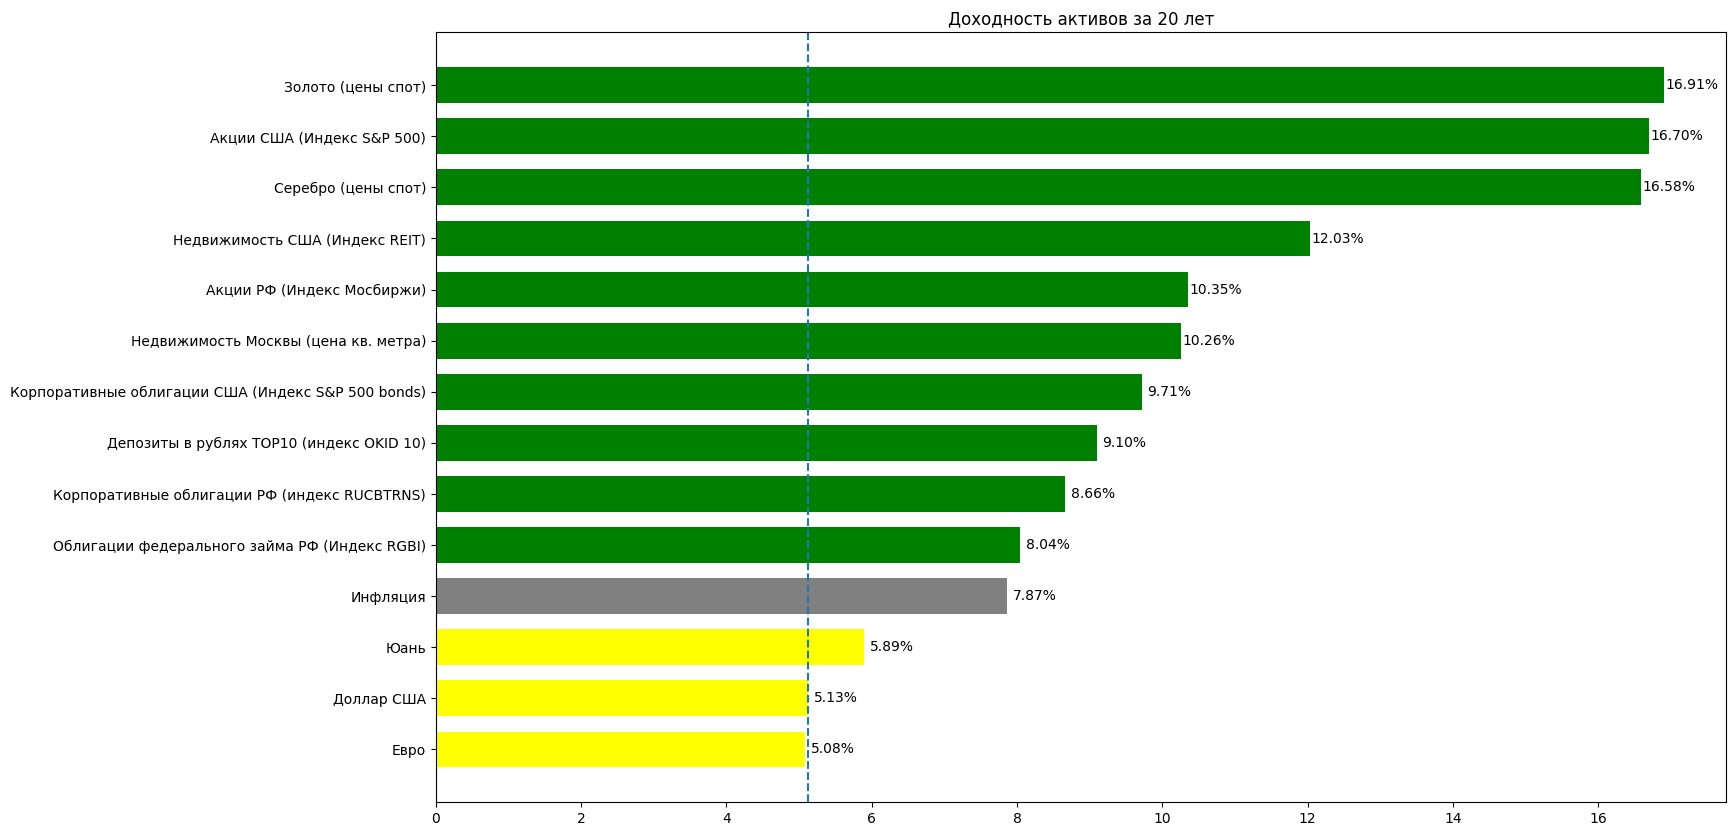

In [15]:
plot_cagr(assets20, lg_2003, 'Доходность активов за 20 лет')

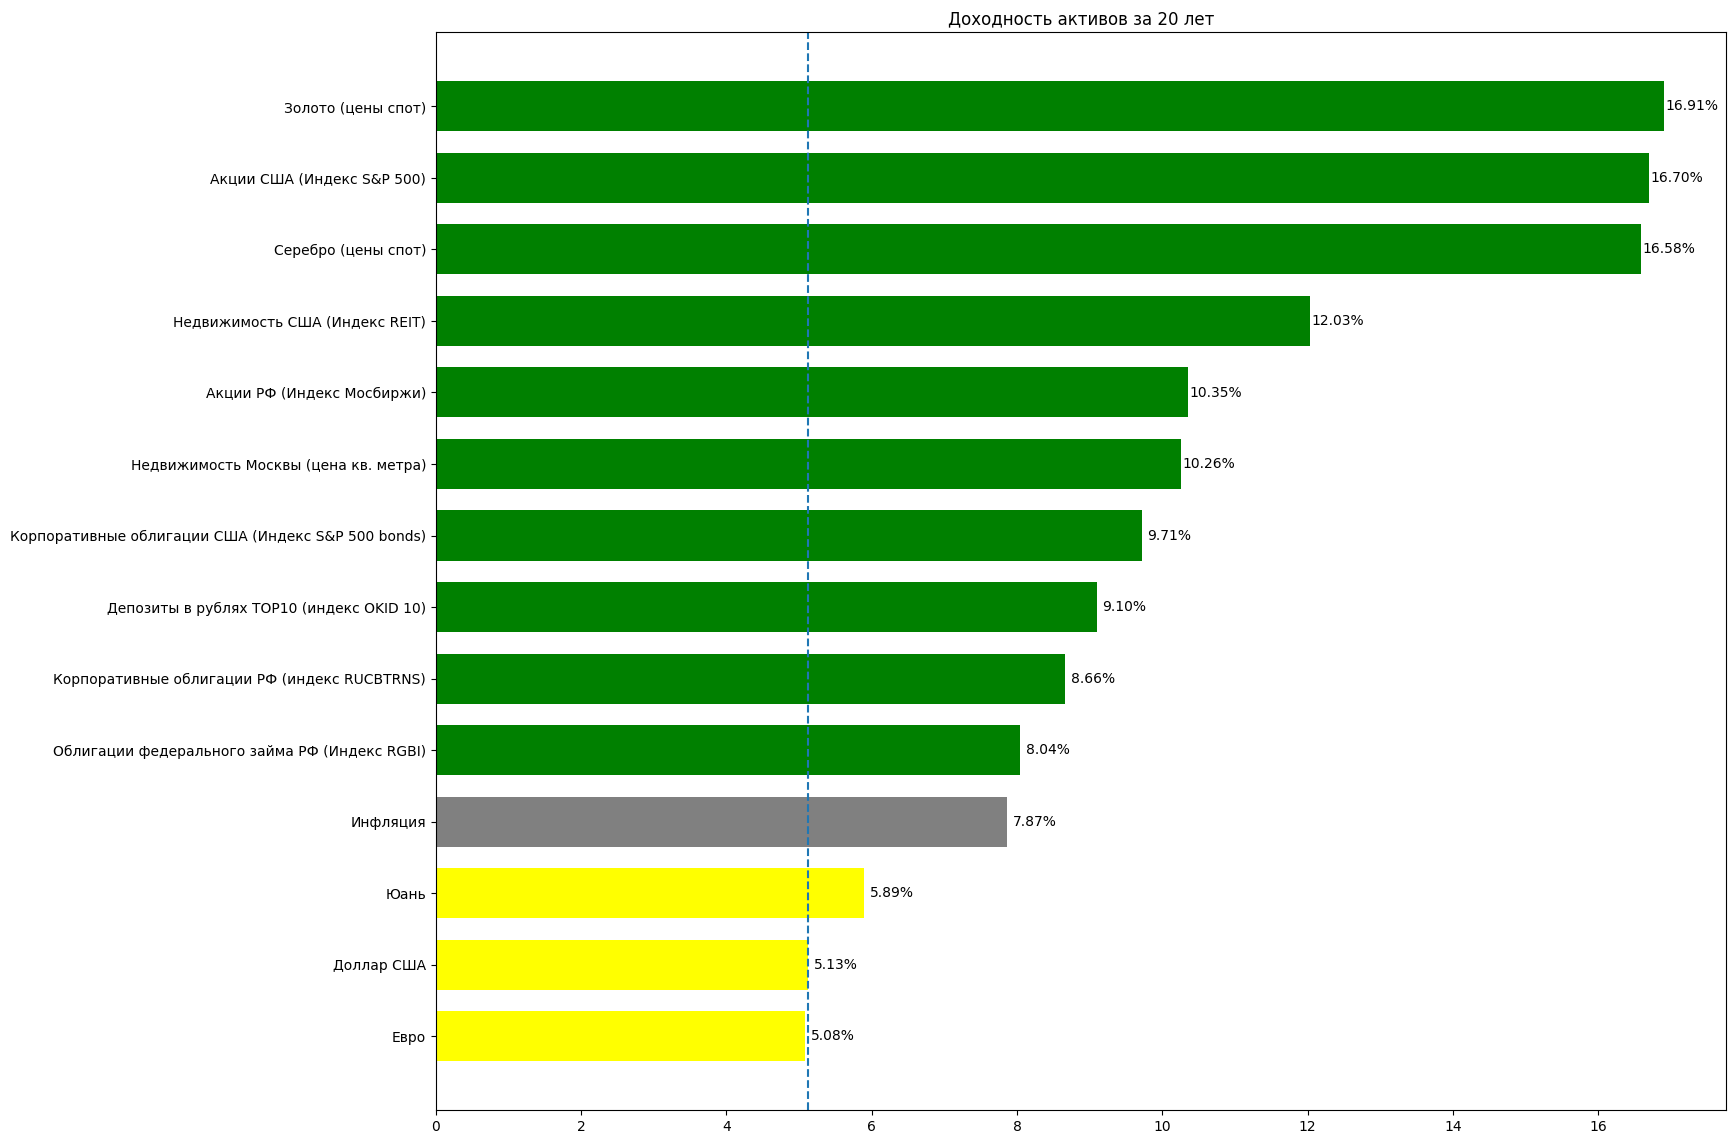

In [16]:
plot_cagr(assets20, lg_2003, 'Доходность активов за 20 лет', figsize=[12, 14])

## 10 лет

In [13]:
assets10 = ok.AssetList(ls_2010, first_date='2016-01', last_date='2025-12', ccy='RUB')
assets10

assets           [RGBITR.INDX, RUCBTRNS.INDX, OKID10.INDX, MCFT...
currency                                                       RUB
first_date                                                 2016-01
last_date                                                  2025-12
period_length                                   10 years, 0 months
inflation                                                 RUB.INFL
dtype: object

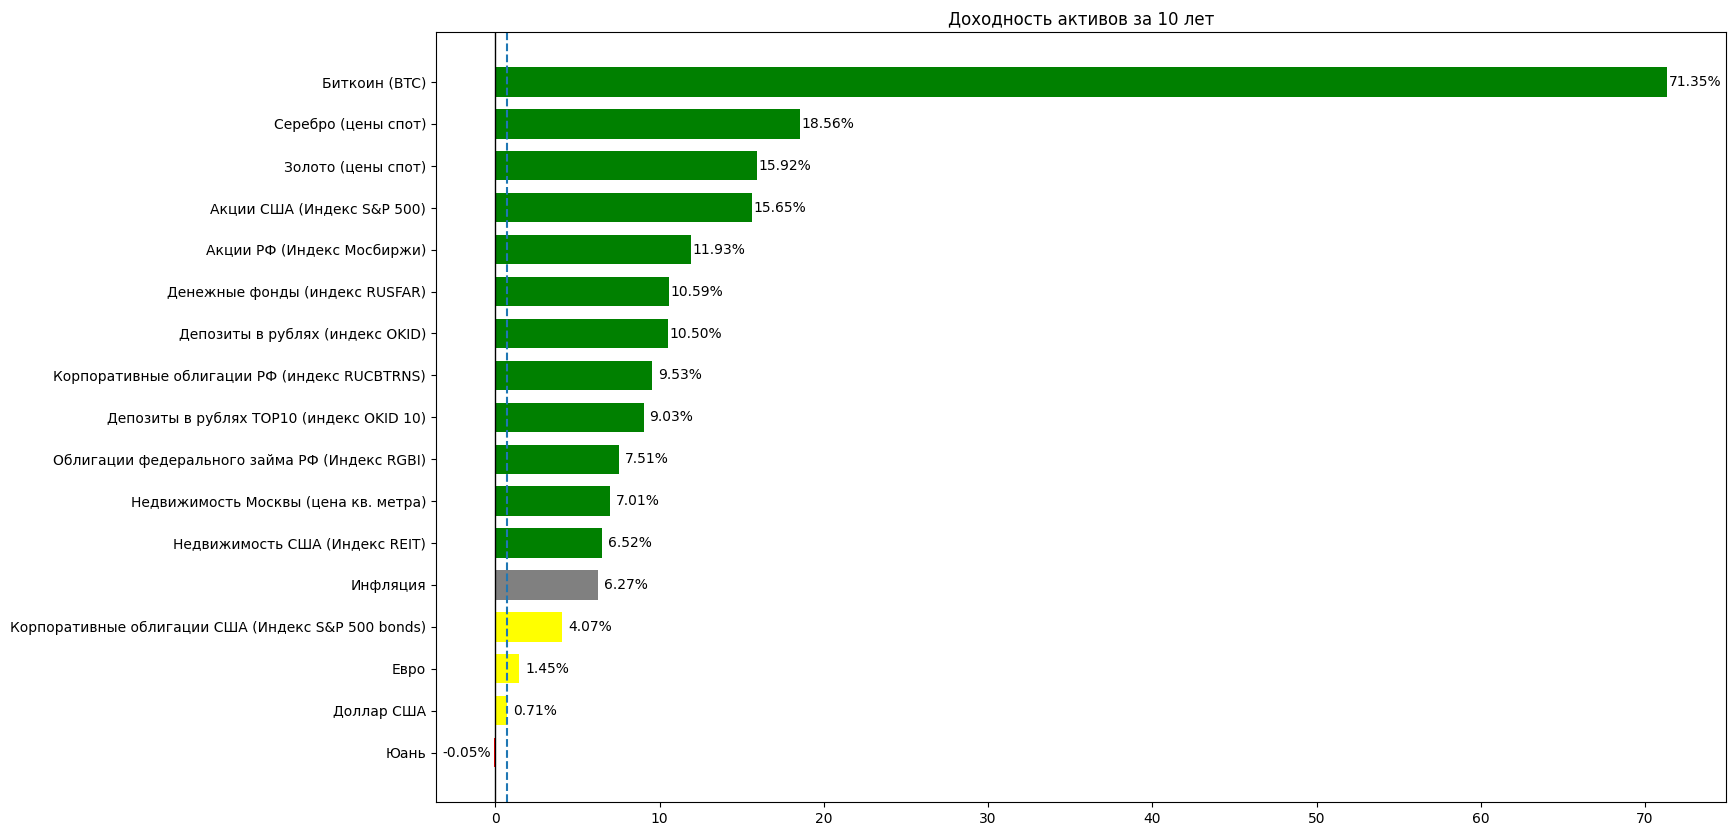

In [14]:
plot_cagr(assets10, lg_2010, 'Доходность активов за 10 лет')

## 5 лет

In [62]:
assets5 = ok.AssetList(ls_2020, first_date='2021-01', last_date='2025-12', ccy='RUB')
assets5

assets           [RGBITR.INDX, RUCBTRNS.INDX, OKID10.INDX, MCFT...
currency                                                       RUB
first_date                                                 2021-01
last_date                                                  2025-12
period_length                                    5 years, 0 months
inflation                                                 RUB.INFL
dtype: object

In [63]:
assets5.assets_first_dates

{'RUONIA.INDX': Timestamp('2020-12-01 00:00:00'),
 'RGBITR.INDX': Timestamp('2021-01-01 00:00:00'),
 'RUCBTRNS.INDX': Timestamp('2021-01-01 00:00:00'),
 'OKID10.INDX': Timestamp('2021-01-01 00:00:00'),
 'MCFTR.INDX': Timestamp('2021-01-01 00:00:00'),
 'SP500TR.INDX': Timestamp('2021-01-01 00:00:00'),
 'SP500BDT.INDX': Timestamp('2021-01-01 00:00:00'),
 'FNER.INDX': Timestamp('2021-01-01 00:00:00'),
 'MOW_SEC.RE': Timestamp('2021-01-01 00:00:00'),
 'GC.COMM': Timestamp('2021-01-01 00:00:00'),
 'SI.COMM': Timestamp('2021-01-01 00:00:00'),
 'USDRUB.FX': Timestamp('2021-01-01 00:00:00'),
 'EURRUB.FX': Timestamp('2021-01-01 00:00:00'),
 'CNYRUB.FX': Timestamp('2021-01-01 00:00:00'),
 'OKID.INDX': Timestamp('2021-01-01 00:00:00'),
 'BTC-USD.CC': Timestamp('2021-01-01 00:00:00'),
 'MREDC.INDX': Timestamp('2021-01-01 00:00:00'),
 'RUB': Timestamp('2021-01-01 00:00:00'),
 'RUB.INFL': Timestamp('2021-01-01 00:00:00')}

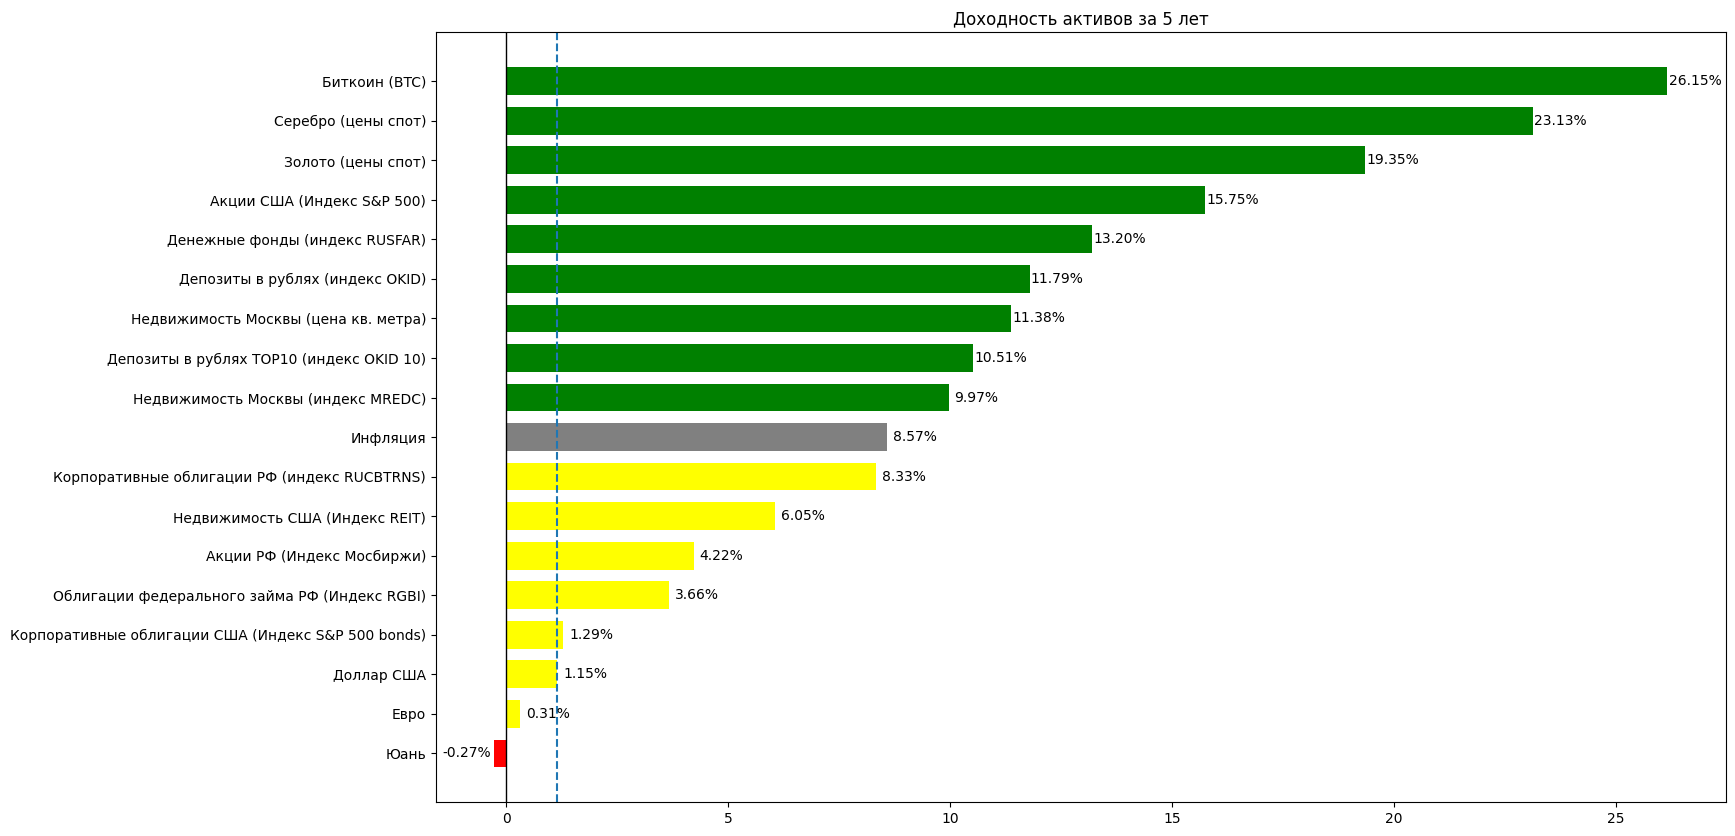

In [64]:
plot_cagr(assets5, lg_2020, 'Доходность активов за 5 лет')

In [65]:
assets5.describe([2, 3])

,property,period,RGBITR.INDX,RUCBTRNS.INDX,OKID10.INDX,MCFTR.INDX,SP500TR.INDX,SP500BDT.INDX,FNER.INDX,MOW_SEC.RE,GC.COMM,SI.COMM,USDRUB.FX,EURRUB.FX,CNYRUB.FX,OKID.INDX,RUONIA.INDX,BTC-USD.CC,MREDC.INDX,inflation
0,Compound return,YTD,0.23095,0.264948,0.186578,0.029293,-0.093023,-0.173781,-0.213264,0.153493,0.267663,0.857741,-0.230625,-0.132007,-0.168817,0.200454,0.208859,-0.279367,0.116035,0.057271
1,CAGR,2 years,0.097804,0.147776,0.16009,0.022766,0.133828,-0.02123,-0.032634,0.061204,0.353393,0.598825,-0.066142,-0.036438,-0.05793,0.170494,0.198543,0.343701,0.075803,0.076037
2,CAGR,3 years,0.066856,0.107749,0.133088,0.171935,0.274378,0.098162,0.099297,0.074936,0.383156,0.483524,0.035982,0.067698,0.040956,0.145184,0.165472,0.804883,0.08564,0.075413
3,CAGR,"5 years, 0 months",0.036633,0.083261,0.105059,0.042229,0.157462,0.012874,0.06049,0.113772,0.193498,0.231257,0.011471,0.003053,-0.002651,0.117861,0.131973,0.261502,0.099669,0.085749
4,Annualized mean return,"5 years, 0 months",0.04394,0.08272,0.1004,0.07588,0.191652,0.041176,0.104922,0.10952,0.211441,0.273037,0.03442,0.02896,0.0227,0.11202,0.12474,0.475831,0.09708,NaN
5,Dividend yield,LTM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,Risk,"5 years, 0 months",0.131141,0.076827,0.014458,0.277302,0.361798,0.250704,0.341399,0.056876,0.317412,0.472209,0.224828,0.236423,0.232423,0.014571,0.018669,1.187761,0.064168,NaN
7,CVAR,"5 years, 0 months",0.206548,0.084575,-0.047921,0.505114,0.368064,0.389025,0.33932,0.023702,0.279862,0.450823,0.293137,0.375313,0.313004,-0.057775,-0.057663,0.754684,0.098586,NaN
8,Max drawdowns,"5 years, 0 months",-0.220989,-0.09348,0.0,-0.512716,-0.48951,-0.443925,-0.480924,-0.044328,-0.436844,-0.50778,-0.39155,-0.425154,-0.418448,0.0,0.0,-0.773029,-0.118361,NaN
9,Max drawdowns dates,"5 years, 0 months",2022-02,2022-03,2021-01,2022-09,2022-06,2022-06,2022-06,2024-09,2022-06,2022-06,2022-06,2022-06,2022-06,2021-01,2021-01,2022-06,2023-01,NaN


## 1 год

In [50]:
assets1 = ok.AssetList(ls_2020, first_date='2025-01', last_date='2025-12', ccy='RUB')
assets1

assets           [RGBITR.INDX, RUCBTRNS.INDX, OKID10.INDX, MCFT...
currency                                                       RUB
first_date                                                 2025-01
last_date                                                  2025-12
period_length                                    1 years, 0 months
inflation                                                 RUB.INFL
dtype: object

In [51]:
assets1.get_cagr()

RGBITR.INDX      0.230950
RUCBTRNS.INDX    0.264948
OKID10.INDX      0.186578
MCFTR.INDX       0.029293
SP500TR.INDX    -0.093023
SP500BDT.INDX   -0.173781
FNER.INDX       -0.213264
MOW_SEC.RE       0.153493
GC.COMM          0.267663
SI.COMM          0.857741
USDRUB.FX       -0.230625
EURRUB.FX       -0.132007
CNYRUB.FX       -0.168817
OKID.INDX        0.200454
RUONIA.INDX      0.208859
BTC-USD.CC      -0.279367
MREDC.INDX       0.116035
RUB.INFL         0.057271
dtype: float64

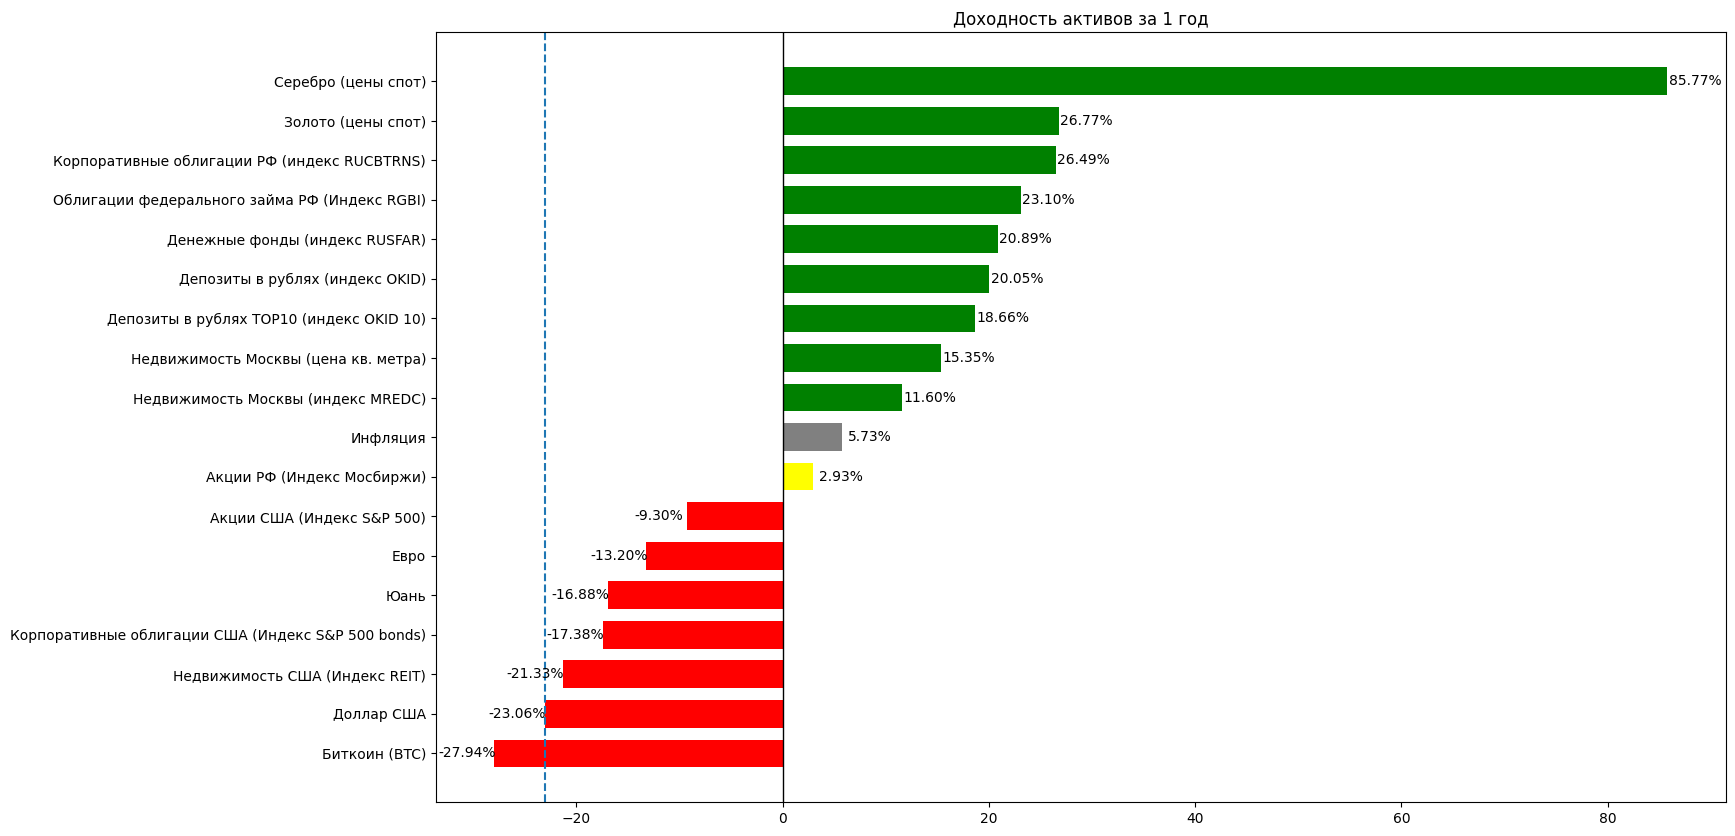

In [52]:
plot_cagr(assets1, lg_2020, 'Доходность активов за 1 год')

In [66]:
assets1.describe()

,property,period,RGBITR.INDX,RUCBTRNS.INDX,OKID10.INDX,MCFTR.INDX,SP500TR.INDX,SP500BDT.INDX,FNER.INDX,MOW_SEC.RE,GC.COMM,SI.COMM,USDRUB.FX,EURRUB.FX,CNYRUB.FX,OKID.INDX,RUONIA.INDX,BTC-USD.CC,MREDC.INDX,inflation
0,Compound return,YTD,0.23095,0.264948,0.186578,0.029293,-0.093023,-0.173781,-0.213264,0.153493,0.267663,0.857741,-0.230625,-0.132007,-0.168817,0.200454,0.208859,-0.279367,0.116035,0.057271
1,CAGR,1 years,0.23095,0.264948,0.186578,0.029293,-0.093023,-0.173781,-0.213264,0.153493,0.267663,0.857741,-0.230625,-0.132007,-0.168817,0.200454,0.208859,-0.279367,0.116035,0.057271
2,CAGR,5 years,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,CAGR,10 years,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,CAGR,"1 years, 0 months",0.23095,0.264948,0.186578,0.029293,-0.093023,-0.173781,-0.213264,0.153493,0.267663,0.857741,-0.230625,-0.132007,-0.168817,0.200454,0.208859,-0.279367,0.116035,0.057271
5,Annualized mean return,"1 years, 0 months",0.2129,0.2382,0.1723,0.0441,-0.07815,-0.181172,-0.230529,0.1454,0.258239,0.692346,-0.2511,-0.1304,-0.1754,0.1841,0.1912,-0.233043,0.1116,NaN
6,Dividend yield,LTM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,Risk,"1 years, 0 months",0.103845,0.054037,0.002026,0.19128,0.188833,0.112784,0.099003,0.071254,0.260696,0.683564,0.104972,0.13188,0.111202,0.002557,0.007168,0.357585,0.059715,NaN
8,CVAR,"1 years, 0 months",-0.23095,-0.264948,-0.186578,-0.029293,0.093023,0.173781,0.213264,-0.153493,-0.267663,-0.857741,0.230625,0.132007,0.168817,-0.200454,-0.208859,0.279367,-0.116035,NaN
9,Max drawdowns,"1 years, 0 months",-0.0273,-0.0069,0.0,-0.158914,-0.230118,-0.186066,-0.193315,-0.019275,-0.097505,-0.17881,-0.201811,-0.131663,-0.185579,0.0,0.0,-0.317926,-0.02106,NaN


## Граница эффективности


In [20]:
x = ok.EfficientFrontier(ls_2003, ccy='RUB', first_date='2006-01', last_date='2025-12', inflation=False, n_points=100)
x

symbols                      [RGBITR.INDX, RUCBTRNS.INDX, OKID10.INDX, MCFT...
currency                                                                   RUB
first_date                                                             2006-01
last_date                                                              2025-12
period_length                                               20 years, 0 months
rebalancing_period                                                        year
rebalancing_abs_deviation                                                 None
rebalancing_rel_deviation                                                 None
bounds                       ((0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0...
inflation                                                                 None
n_points                                                                   100
dtype: object

In [21]:
y = ok.EfficientFrontier(ls_2003, ccy='RUB', first_date='2005-01', last_date='2024-12', inflation=False, n_points=100)
y

symbols                      [RGBITR.INDX, RUCBTRNS.INDX, OKID10.INDX, MCFT...
currency                                                                   RUB
first_date                                                             2005-01
last_date                                                              2024-12
period_length                                               20 years, 0 months
rebalancing_period                                                        year
rebalancing_abs_deviation                                                 None
rebalancing_rel_deviation                                                 None
bounds                       ((0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0...
inflation                                                                 None
n_points                                                                   100
dtype: object

In [22]:
df = x.ef_points

In [23]:
df_last_y = y.ef_points

In [24]:
short_names_2003 = {
    'RGBITR.INDX': 'ОФЗ',
    'RUCBTRNS.INDX': 'Облигации РФ',
    'OKID10.INDX': 'Депозиты',
    'MCFTR.INDX': 'Акции РФ',
    'SP500TR.INDX': 'Акции США',
    'SP500BDT.INDX': 'Облигации США',
    'FNER.INDX': 'REIT',
    'MOW_SEC.RE': 'Недвижимость Москвы',
    'GC.COMM': 'Золото',
    'SI.COMM': 'Серебро',
    'USDRUB.FX': 'USD',
    'EURRUB.FX': 'EUR',
    'CNYRUB.FX': 'CNY',
}

<Axes: title={'center': 'Граница эффективности - 20 лет (2006 - 2025)'}, xlabel='Риск', ylabel='Доходность'>

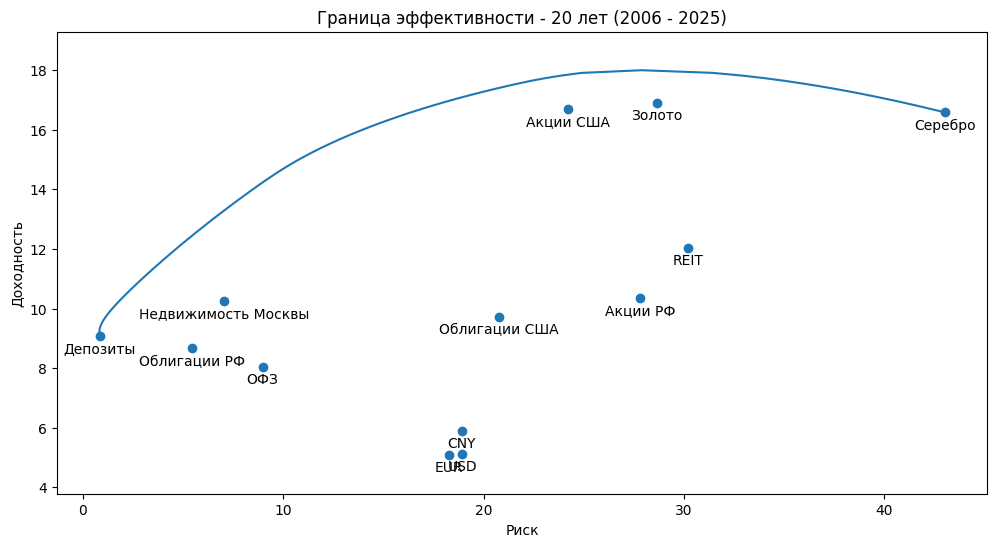

In [26]:
fig, ax = plt.subplots()

# Plotting the Efficient Frontier
ax.plot(df['Risk']*100, df['CAGR']*100)
# ax.plot(df_last_y['Risk']*100, df_last_y['CAGR']*100, linestyle='dashed')

# Set X and Y labels
ax.set_xlabel('Риск')
ax.set_ylabel('Доходность')

ax.set_title("Граница эффективности - 20 лет (2006 - 2025)")

# Plotting the assets
x.plot_assets(kind='cagr', pct_values=True, tickers=list(short_names_2003.values()), xy_text=(0, -12))
# y.plot_assets(kind='cagr', pct_values=True, tickers=list(short_names_2003.values()), xy_text=(0, -12))


Text(0.5, 1.0, 'Доходность и риск за 20 лет')

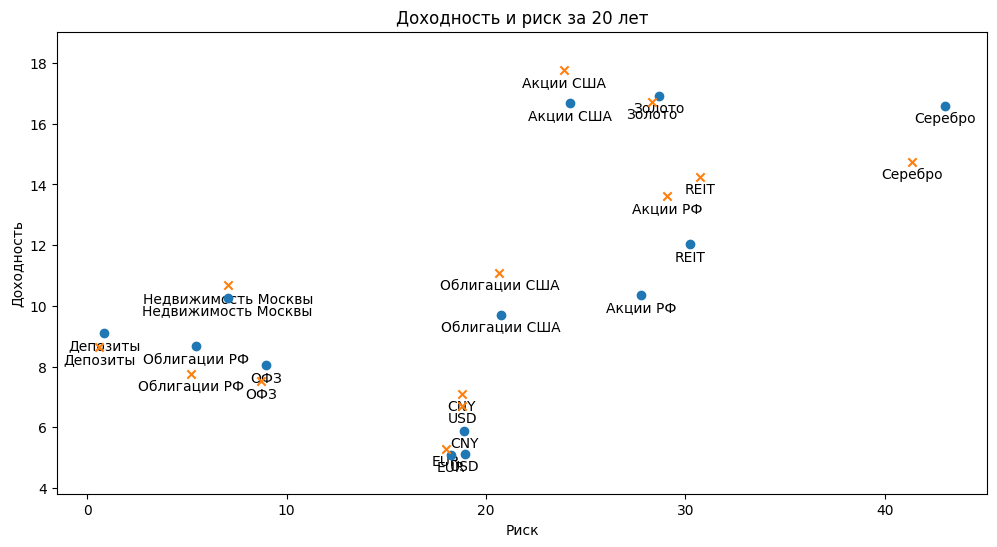

In [57]:
fig, ax = plt.subplots()
x.plot_assets(kind='cagr', pct_values=True, tickers=list(short_names_2003.values()), xy_text=(0, -12), marker='o')
y.plot_assets(kind='cagr', pct_values=True, tickers=list(short_names_2003.values()), xy_text=(0, -12), marker='x')

# Set X and Y labels
ax.set_xlabel('Риск')
ax.set_ylabel('Доходность')
ax.set_title("Доходность и риск за 20 лет")

## Корреляция классов

In [67]:
ls_classes = [
    'MCFTR.INDX',
    'RGBITR.INDX',
    'RUCBTRNS.INDX',
    'SP500TR.INDX',
    'GC.COMM',
]
 
lg_classes = [
    "ОФЗ",
    "Корпоративные облигации",
    "Акции США",
    "Золото"
]

In [68]:
cl = ok.AssetList(ls_classes, ccy='RUB', inflation=False)
cl

assets           [MCFTR.INDX, RGBITR.INDX, RUCBTRNS.INDX, SP500...
currency                                                       RUB
first_date                                                 2003-01
last_date                                                  2025-12
period_length                                   23 years, 0 months
inflation                                                     None
dtype: object

Text(0.5, 1.0, 'Долгосрочная корреляция между Индексом Мосбиржи и ОФЗ, Корпоративными облигациями РФ, Акциями США, золотом')

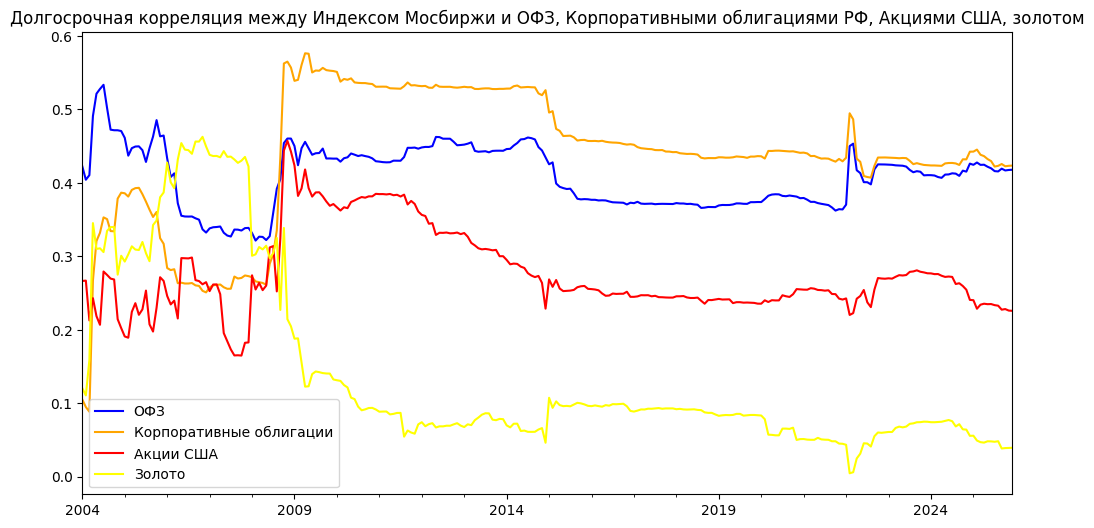

In [69]:
cl.index_corr().plot(color=["blue", "orange", "red", "yellow"])
plt.legend(lg_classes)
plt.xlabel("")
plt.title("Долгосрочная корреляция между Индексом Мосбиржи и ОФЗ, Корпоративными облигациями РФ, Акциями США, золотом")

Text(0.5, 1.0, 'Долгосрочная корреляция между Индексом Мосбиржи и другими активами. Скользящая 10 лет')

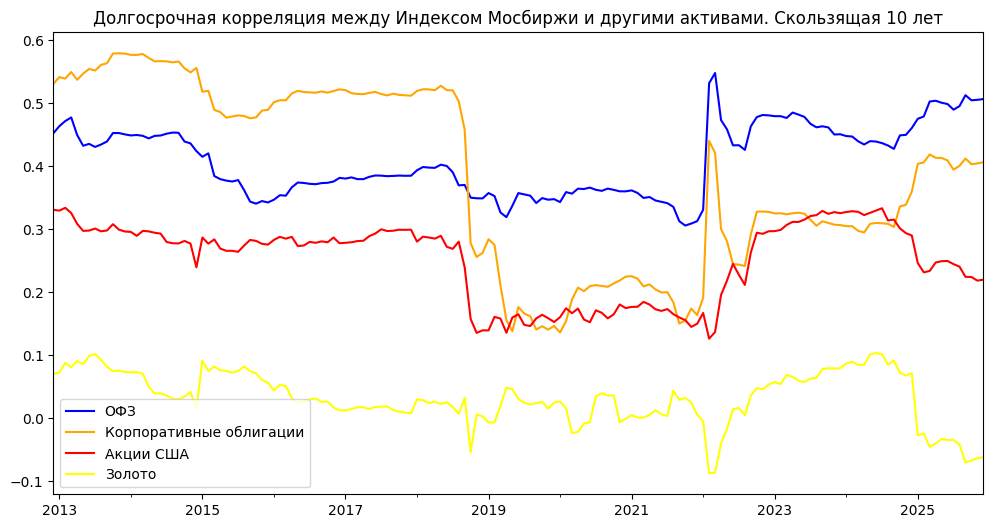

In [81]:
cl.index_corr(rolling_window=12*10).plot(color=["blue", "orange", "red", "yellow"])
plt.legend(lg_classes)
plt.xlabel("")
plt.title("Долгосрочная корреляция между Индексом Мосбиржи и другими активами. Скользящая 10 лет")

## Риск

In [60]:
risk_assets_us = {
    "VBMFX.US": "Облигации США",
    "SP500TR.INDX": "Акции США",
}

first_date_dt=Period('1998-01', 'M')


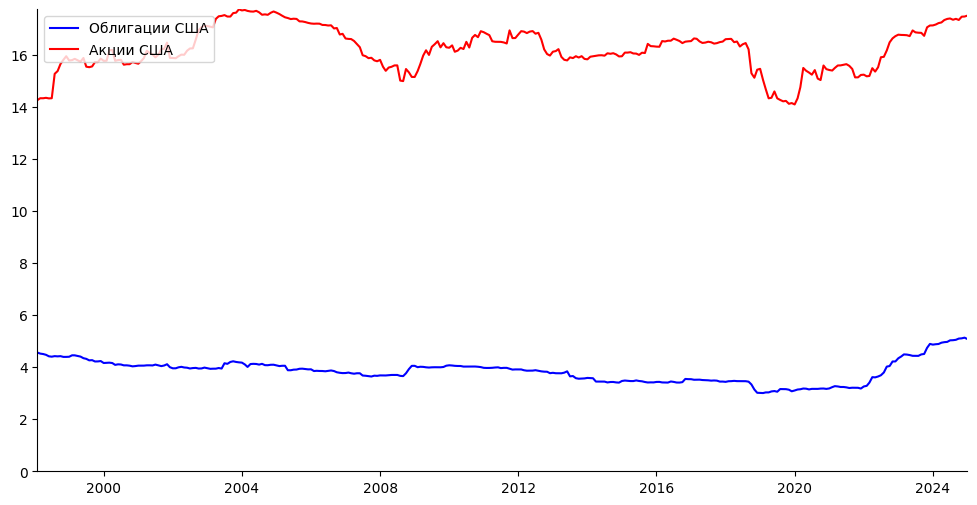

In [62]:
plot_rolling_cagr(assets_dict=risk_assets_us, ccy="USD", window=10*12, real=False, chart="risk")

In [64]:
risk_assets_ru = {
    "MCFTR.INDX": "Акции РФ",
    "RUCBTRNS.INDX": "Облигации РФ",
}

first_date_dt=Period('2012-12', 'M')


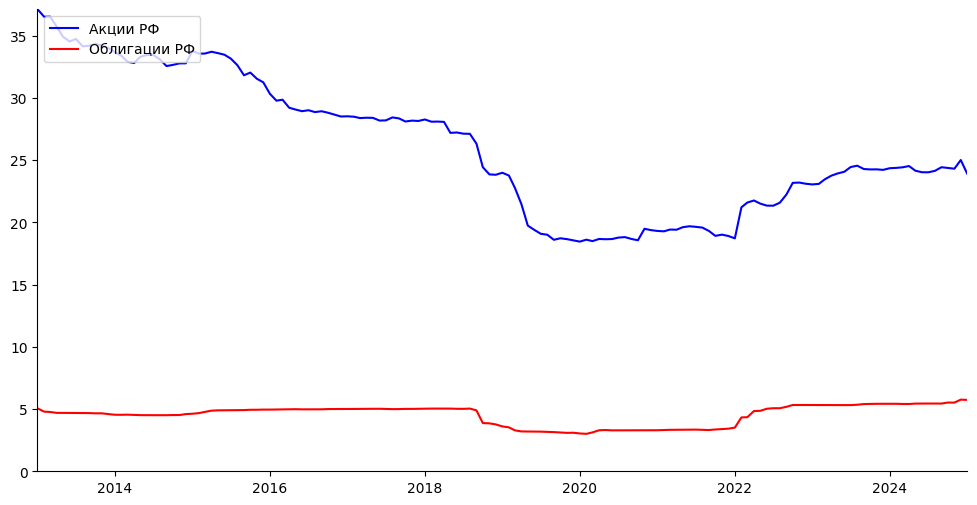

In [66]:
plot_rolling_cagr(assets_dict=risk_assets_ru, ccy="RUB", window=10*12, real=False, chart="risk")

## Скользящие

### Денежные фонды, облигации, депозиты

In [77]:
fix_return_dict = {
    'RUCBTRNS.INDX': "Корпоративные облигации - RUCBTRNS",
    'RUONIA.INDX': 'Фонды денежного рынка - RUONIA',
    # 'RUGBINFTR.INDX': 'Инфляционные облигации - RUGBINFTR',
    'OKID.INDX': "Депозиты в рублях - OKID",
    'OKID10.INDX': "Депозиты в рублях в TOP10 - OKID10",
}

first_date_dt=Period('2015-06', 'M')


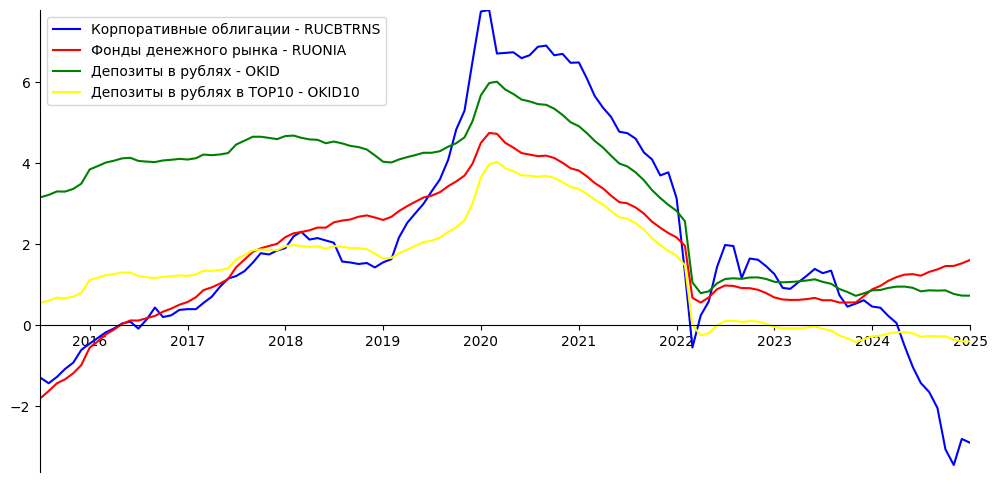

In [78]:
plot_rolling_cagr(assets_dict=fix_return_dict, ccy="RUB", window=5*12, real=True)

### ОФЗ и корпоративные облигации

In [81]:
obl = {
    'RGBITR.INDX': 'Облигации федерального займа - RGBITR',
    'RUCBTRNS.INDX': 'Корпоративные облигации - RUCBTRNS',
    # 'RUHYRAIF.INDX': 'Мусорные облигации',
}

first_date_dt=Period('2007-12', 'M')


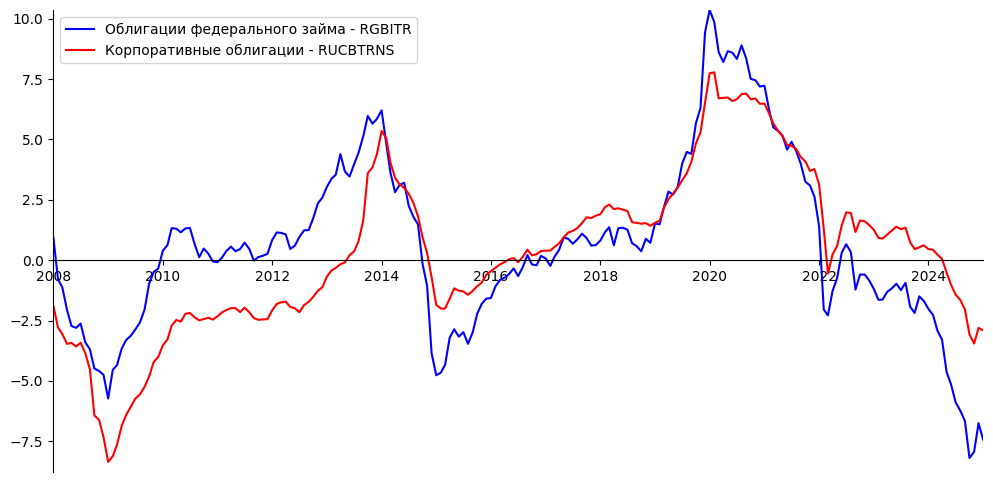

In [82]:
plot_rolling_cagr(assets_dict=obl, ccy="RUB", window=5*12, real=True, draw_zero_axe=True)

### MOEX vs SP500

In [99]:
stocks = {
    'MCFTR.INDX': 'Индекс Московской биржи - MCFTR',
    'SP500TR.INDX': 'Индекс S&P500 - SP500TR',
    # 'FXI.US': 'Индекс акций Китая - FTSE China 50 Index (ГонКонг)',
    # 'NIF500TRI.INDX': 'Индия NIFTY500'
}

first_date_dt=Period('2002-09', 'M')


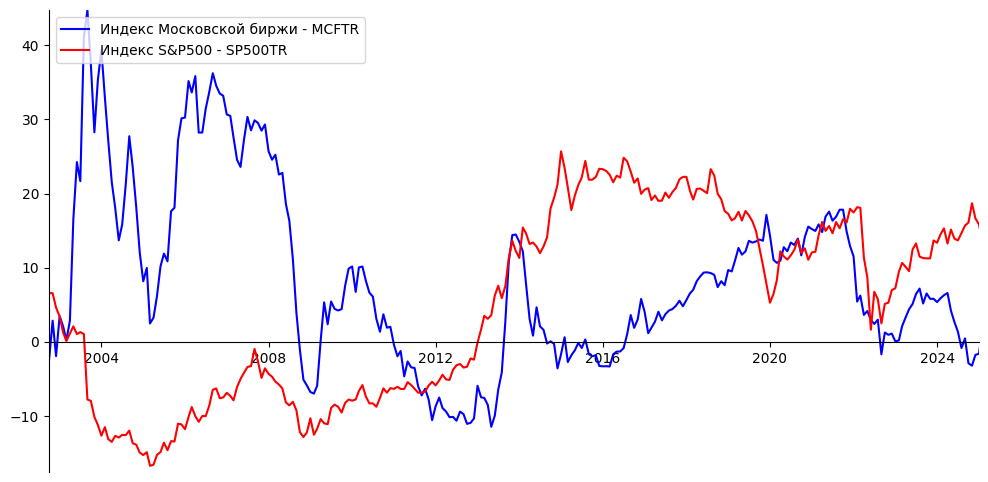

In [100]:
plot_rolling_cagr(assets_dict=stocks, ccy="RUB", window=5*12, real=True, draw_zero_axe=True)

### Золото и акции России

In [103]:
gld = {
    'GC.COMM': "Золото",
    # 'SI.COMM': "Серебро",
    'MCFTR.INDX': 'Индекс Московской биржи - MCFTR',
}

2026-01-06 09:16:11,878 - WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='api.okama.io', port=443): Read timed out. (read timeout=10)")': /api/ts/ror/USDRUB.FX?first_date=1975-02-01+00%3A00%3A00&last_date=2026-01-01+00%3A00%3A00&period=M


first_date_dt=Period('2002-09', 'M')


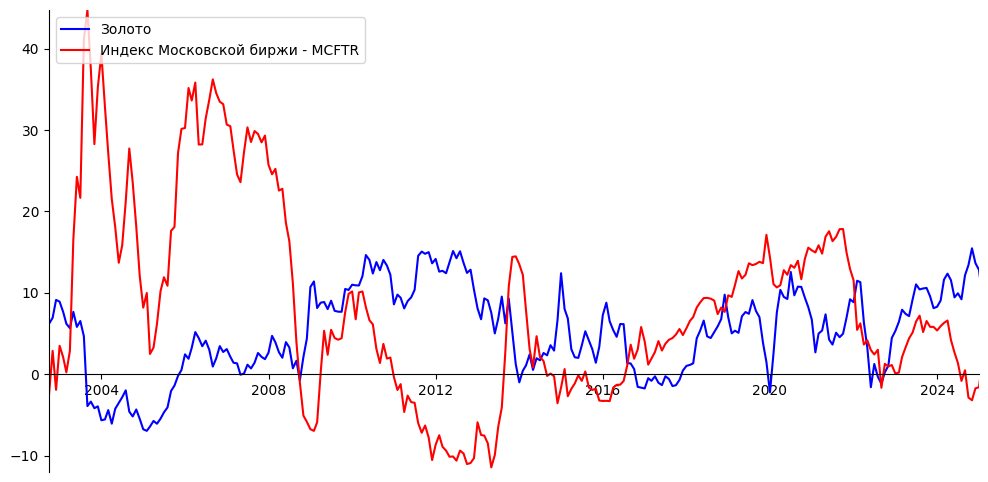

In [104]:
plot_rolling_cagr(assets_dict=gld, ccy="RUB", window=5*12, real=True, draw_zero_axe=True)

first_date_dt=Period('2007-09', 'M')


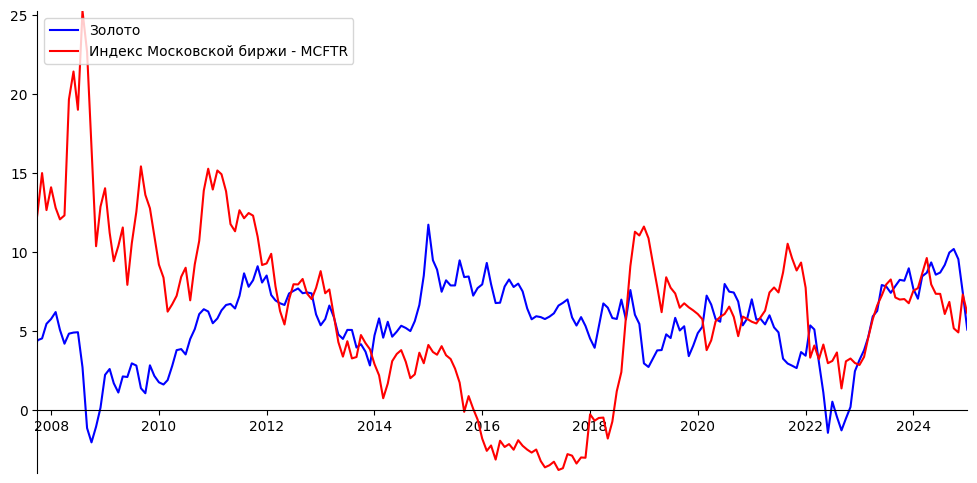

In [54]:
plot_rolling_cagr(assets_dict=gld, ccy="RUB", window=10*12, real=True, draw_zero_axe=True)

### Золото и серебро

In [106]:
gld_slv = {
    'GC.COMM': "Золото",
    'SI.COMM': "Серебро",
}

first_date_dt=Period('1997-07', 'M')


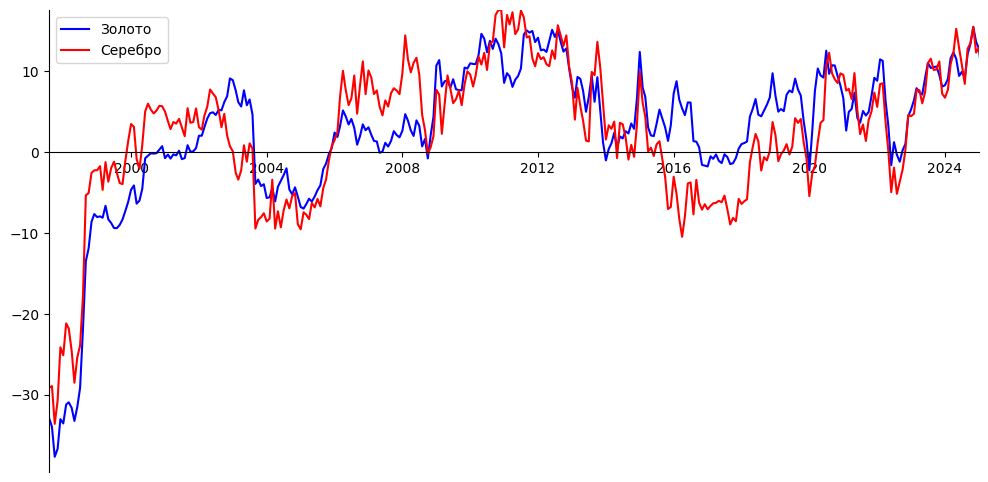

In [107]:
plot_rolling_cagr(assets_dict=gld_slv, ccy="RUB", window=5*12, real=True, draw_zero_axe=True)

In [ ]:
x = ok.AssetList(gld_slv.keys(), first_date='2006-01', ccy='RUB', inflation=False)

Text(0.5, 1.0, 'Золото и серебро. Накопленная доходность 20 лет')

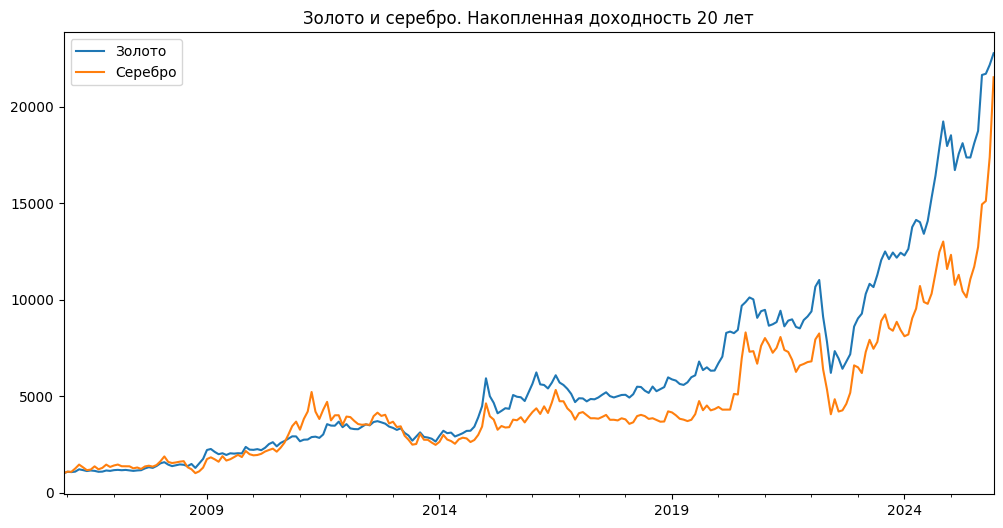

In [114]:
x.wealth_indexes.plot(logy=False)
plt.legend(gld_slv.values())
plt.xlabel("")
plt.title("Золото и серебро. Накопленная доходность 20 лет")

In [115]:
x.annual_return_ts

Symbols,GC.COMM,SI.COMM
date,,
2006,0.123803,0.328191
2007,0.225107,0.075255
2008,0.266782,-0.093674
2009,0.275927,0.535065
2010,0.307775,0.850318
2011,0.164165,-0.046810
2012,0.009175,0.021593
2013,-0.226838,-0.309553
2014,0.693110,0.383886


### Доллар США

In [38]:
usd = {
    'USDRUB.FX': "Доллар США",
    # 'OKID.INDX': "Депозиты в рублях",
    # 'RUCBTRNS.INDX': "Корпоративные облигации"
}

first_date_dt=Period('1997-07', 'M')


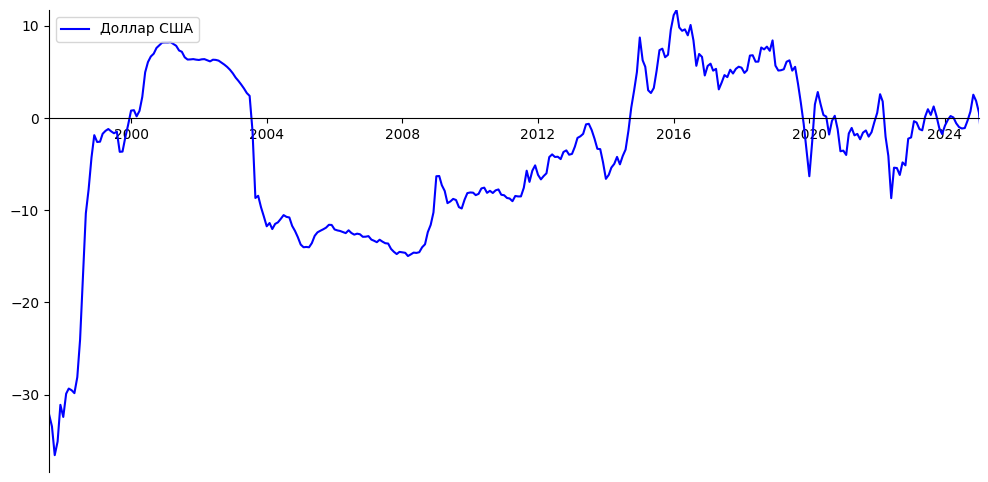

In [59]:
plot_rolling_cagr(assets_dict=usd, ccy="RUB", window=5*12, real=True, draw_zero_axe=True)

### BTC

In [118]:
## BTC
btc = {
    'BTC-USD.CC': "Биткоин",
    # 'ETH-USD.CC': "Эфир",
    # 'OKID.INDX': "Депозиты в рублях",
    # 'RUCBTRNS.INDX': "Корпоративные облигации"
}

first_date_dt=Period('2015-07', 'M')


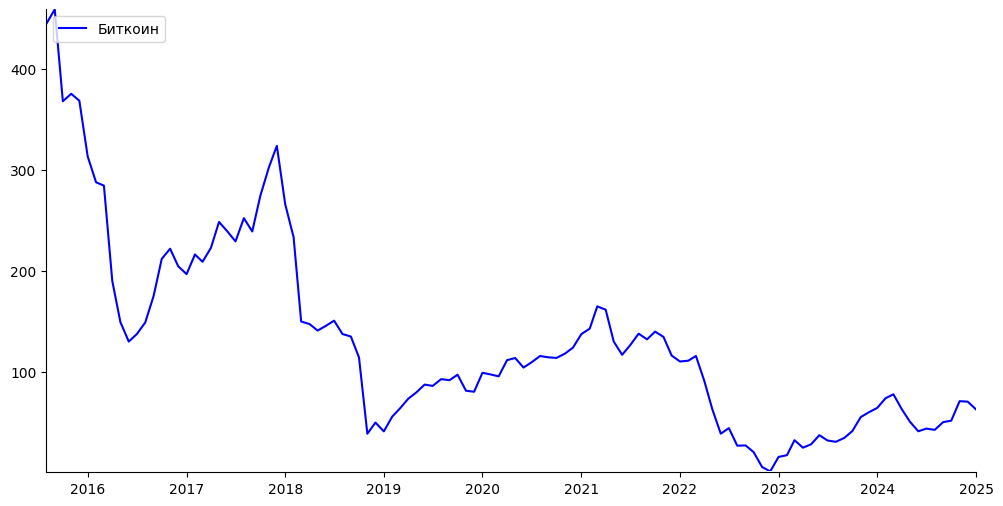

In [ ]:
plot_rolling_cagr(assets_dict=btc, ccy="RUB", window=5*12, real=True)

first_date_dt=Period('2015-12', 'M')


Text(0.5, 1.0, 'Стандартное отклонение годовой доходности BTC')

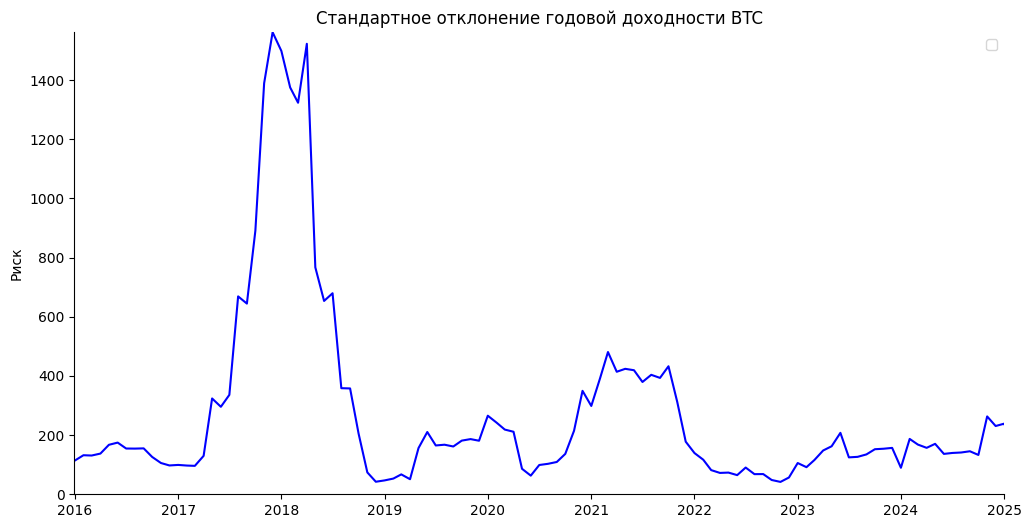

In [132]:
plot_rolling_cagr(assets_dict=btc, ccy="RUB", first_date='2015-01', window=12*1, real=False, chart="risk")
plt.legend("")
plt.xlabel("")
plt.ylabel("Риск")
plt.title("Стандартное отклонение годовой доходности BTC")

first_date_dt=Period('2020-08', 'M')


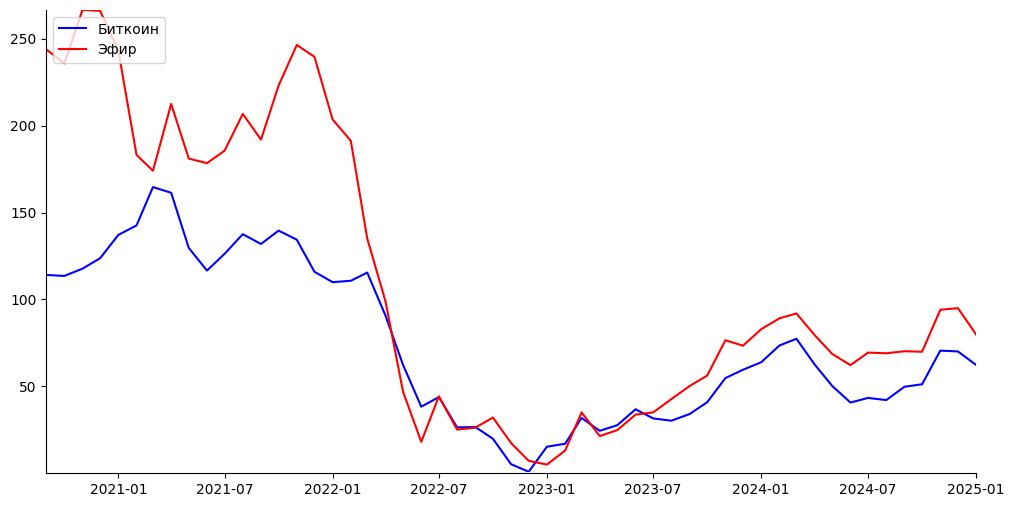

In [117]:
plot_rolling_cagr(assets_dict=btc, ccy="RUB", window=5*12, real=True)

## CAPE10

In [108]:
cape_symbols = ok.symbols_in_namespace('RATIO')['symbol']

In [110]:
cape_objects = [ok.Indicator(cape, first_date='2010-01') for cape in cape_symbols]

In [111]:
len(cape_objects)

26

Text(0.5, 1.0, 'Циклический P/E Шиллера (CAPE10). Январь 2025')

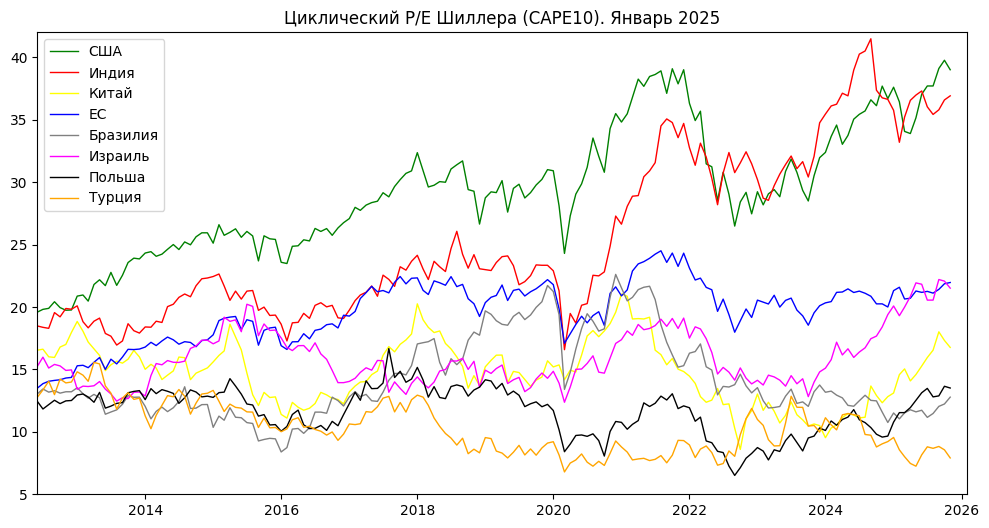

In [112]:
pl = ok.Indicator('POL_CAPE10.RATIO').values_monthly
tk = ok.Indicator('TUR_CAPE10.RATIO').values_monthly
chn = ok.Indicator('CHN_CAPE10.RATIO').values_monthly
# rus = ok.Indicator('RUS_CAPE10.RATIO').values_monthly
isr = ok.Indicator('ISR_CAPE10.RATIO').values_monthly
usa = ok.Indicator('USA_CAPE10.RATIO').values_monthly
ind = ok.Indicator('IND_CAPE10.RATIO').values_monthly
eur = ok.Indicator('EUR_CAPE10.RATIO').values_monthly
bra = ok.Indicator('BRA_CAPE10.RATIO').values_monthly


fig, ax = plt.subplots(figsize=[12, 6])
first_date_dt = pd.to_datetime('2012-06')  # дата начала графика
last_date_dt = pd.to_datetime('2026-01')  # дата конца

ax.plot(usa.index.to_timestamp(), usa, color ='green', linewidth = 1, label='США')
ax.plot(ind.index.to_timestamp(), ind, color ='red', linewidth = 1, label='Индия')
ax.plot(chn.index.to_timestamp(), chn, color ='yellow', linewidth = 1, label='Китай')
ax.plot(eur.index.to_timestamp(), eur, color ='blue', linewidth = 1, label='ЕС')
ax.plot(eur.index.to_timestamp(), bra, color ='gray', linewidth = 1, label='Бразилия')
ax.plot(eur.index.to_timestamp(), isr, color ='magenta', linewidth = 1, label='Израиль')
ax.plot(chn.index.to_timestamp(), pl, color ='black', linewidth = 1, label='Польша')
ax.plot(eur.index.to_timestamp(), tk, color ='orange', linewidth = 1, label='Турция')

ax.set_xlim(first_date_dt, last_date_dt + pd.DateOffset(months=1))   # прибавляем 1 месяц, чтобы в конце графика было пустое пространство
ax.set_ylim(5, 42)
ax.legend(loc='upper left')
ax.set_title('Циклический P/E Шиллера (CAPE10). Январь 2025')

In [113]:
cape_df = pd.DataFrame({cape.country: cape.values_monthly for cape in cape_objects})
print(cape_df["Russia"].tail(5))
cape_df.drop('Russia', axis=1, inplace=True)

date
2025-07   NaN
2025-08   NaN
2025-09   NaN
2025-10   NaN
2025-11   NaN
Freq: M, Name: Russia, dtype: float64


In [114]:
cape_df.iloc[-1].sort_values(ascending=False)

USA             39.00
India           36.91
Taiwan          34.95
Netherlands     34.46
Canada          28.69
Japan           26.41
Switzerland     25.42
Germany         24.52
France          24.12
South Africa    22.89
Europe          21.96
Australia       21.94
Italy           21.77
Spain           21.62
Israel          21.51
Sweden          21.15
Singapore       21.14
Mexico          20.17
Korea           20.15
Hong Kong       18.41
UK              18.16
China           16.76
Poland          13.51
Brazil          12.78
Turkey           7.91
Name: 2025-11, dtype: float64

In [115]:
cape_df.iloc[-1].sort_values().to_csv("cape10_2025.csv")

<Axes: xlabel='date'>

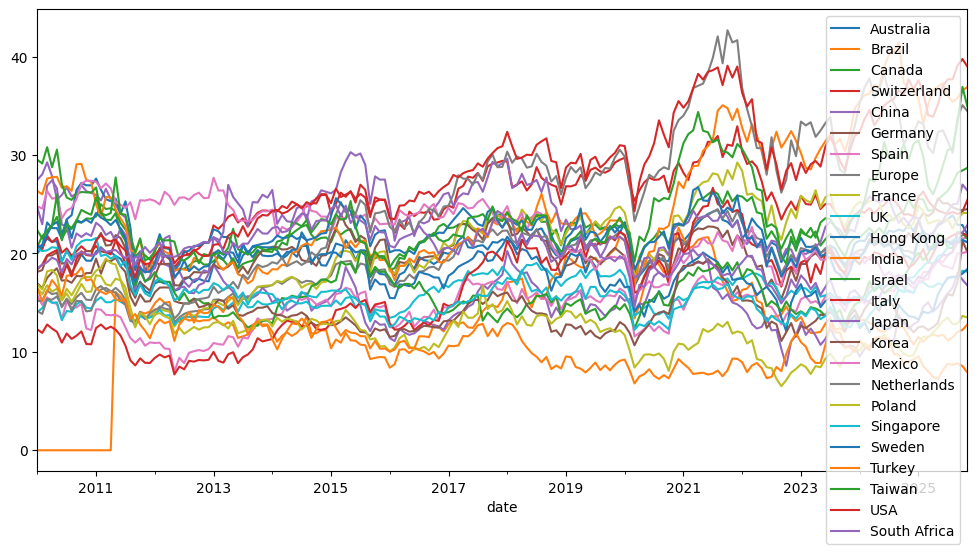

In [116]:
cape_df.plot(figsize=[12.0, 6.0])